### sj8em
## assignment_spark

In [1]:
import pyspark
from os import listdir
from os.path import isfile, join
import boto3
import pandas as pd
from sagemaker import get_execution_role
from pyspark.sql.types import LongType, StringType, StructField, StructType, BooleanType, ArrayType, IntegerType

## Initialize the spark environment

In [2]:
conf = pyspark.SparkConf().setAppName('odl').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
sqlc = pyspark.sql.SQLContext(sc)
sc

<SparkContext master=local appName=odl>

In [3]:
sqlc

## Connect to S3
### Read into spark dataframe from csv in s3

In [4]:
role = get_execution_role()
bucket='odl-spark19spds6003-001'
data_key = 'sj8em/sj8em.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)
pd.read_csv(data_location)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [5]:
df = sqlc.createDataFrame(pd.read_csv(data_location))

In [6]:
df

DataFrame[fixed acidity: double, volatile acidity: double, citric acid: double, residual sugar: double, chlorides: double, free sulfur dioxide: double, total sulfur dioxide: double, density: double, pH: double, sulphates: double, alcohol: double, quality: bigint]

### Write parquet to s3

In [8]:

df = df.withColumnRenamed("fixed acidity", "fixedacidity")
df = df.withColumnRenamed("volatile acidity", "volatileacidity")
df = df.withColumnRenamed("citric acid", "citricacid")
df = df.withColumnRenamed("residual sugar", "residualsugar")
df = df.withColumnRenamed("free sulfur dioxide", "freesulfurdioxide")
df = df.withColumnRenamed("total sulfur dioxide", "totalsulfurdioxide")
parquetPath = '/home/ec2-user/SageMaker/Open-Data-Lab/education/sj8em_2'
df.write.parquet(parquetPath)

### Write to spark dataframe from parquet

In [9]:
df = sqlc.read.parquet(parquetPath)

In [10]:
df

DataFrame[fixedacidity: double, volatileacidity: double, citricacid: double, residualsugar: double, chlorides: double, freesulfurdioxide: double, totalsulfurdioxide: double, density: double, pH: double, sulphates: double, alcohol: double, quality: bigint]

In [11]:
df = df.dropna() 

## MLlib Basics
* exploratory tools


In [12]:
display(df)

DataFrame[fixedacidity: double, volatileacidity: double, citricacid: double, residualsugar: double, chlorides: double, freesulfurdioxide: double, totalsulfurdioxide: double, density: double, pH: double, sulphates: double, alcohol: double, quality: bigint]

In [13]:
df.printSchema()

root
 |-- fixedacidity: double (nullable = true)
 |-- volatileacidity: double (nullable = true)
 |-- citricacid: double (nullable = true)
 |-- residualsugar: double (nullable = true)
 |-- chlorides: double (nullable = true)
 |-- freesulfurdioxide: double (nullable = true)
 |-- totalsulfurdioxide: double (nullable = true)
 |-- density: double (nullable = true)
 |-- pH: double (nullable = true)
 |-- sulphates: double (nullable = true)
 |-- alcohol: double (nullable = true)
 |-- quality: long (nullable = true)



In [14]:
df.take(5)

[Row(fixedacidity=7.4, volatileacidity=0.7, citricacid=0.0, residualsugar=1.9, chlorides=0.076, freesulfurdioxide=11.0, totalsulfurdioxide=34.0, density=0.9978, pH=3.51, sulphates=0.56, alcohol=9.4, quality=5),
 Row(fixedacidity=7.8, volatileacidity=0.88, citricacid=0.0, residualsugar=2.6, chlorides=0.098, freesulfurdioxide=25.0, totalsulfurdioxide=67.0, density=0.9968, pH=3.2, sulphates=0.68, alcohol=9.8, quality=5),
 Row(fixedacidity=7.8, volatileacidity=0.76, citricacid=0.04, residualsugar=2.3, chlorides=0.092, freesulfurdioxide=15.0, totalsulfurdioxide=54.0, density=0.997, pH=3.26, sulphates=0.65, alcohol=9.8, quality=5),
 Row(fixedacidity=11.2, volatileacidity=0.28, citricacid=0.56, residualsugar=1.9, chlorides=0.075, freesulfurdioxide=17.0, totalsulfurdioxide=60.0, density=0.998, pH=3.16, sulphates=0.58, alcohol=9.8, quality=6),
 Row(fixedacidity=7.4, volatileacidity=0.7, citricacid=0.0, residualsugar=1.9, chlorides=0.076, freesulfurdioxide=11.0, totalsulfurdioxide=34.0, density=

In [15]:
print("Pearson's r(quality,fixedacidity) = {}".format(df.corr("quality", "fixedacidity")))
print("Pearson's r(quality,pH) = {}".format(df.corr("quality", "pH")))
print("Pearson's r(quality,alcohol) = {}".format(df.corr("quality", "alcohol")))

Pearson's r(quality,fixedacidity) = 0.12405164911322263
Pearson's r(quality,pH) = -0.0577313912053826
Pearson's r(quality,alcohol) = 0.4761663240011364


In [16]:
#df = df.select("quality","alcohol")

### Make Training and Test sets

In [17]:
# create train/test sets
seed = 42
(testDF, trainingDF) = df.randomSplit((0.20, 0.80), seed=seed)
print ('training set N = {}, test set N = {}'.format(trainingDF.count(),testDF.count()))

training set N = 1289, test set N = 310


# Vectorization

In [18]:
from pyspark.ml.linalg import Vectors, VectorUDT # nb: bad form, done for pedagogy

In [19]:
# make a user defined function (udf)
sqlc.registerFunction("oneElementVec", lambda d: Vectors.dense([d]), returnType=VectorUDT())

# vectorize the data frames
trainingDF = trainingDF.selectExpr("quality", "oneElementVec(alcohol) as alcohol")
testDF = testDF.selectExpr("quality", "oneElementVec(alcohol) as alcohol")

print(testDF.orderBy(testDF.quality.desc()).limit(5))

DataFrame[quality: bigint, alcohol: vector]


In [20]:
# renaming
trainingDF = trainingDF.withColumnRenamed("quality", "label").withColumnRenamed("alcohol", "features")
testDF = testDF.withColumnRenamed("quality", "label").withColumnRenamed("alcohol", "features")

## ML 
1. Train
2. Predict
3. Evaluate

In [21]:
from pyspark.ml.regression import LinearRegression, LinearRegressionModel

lr = LinearRegression()
lrModel = lr.fit(trainingDF)

In [22]:
type(lrModel)

pyspark.ml.regression.LinearRegressionModel

In [23]:
predictionsAndLabelsDF = lrModel.transform(testDF)

print(predictionsAndLabelsDF.orderBy(predictionsAndLabelsDF.label.desc()).take(5))

[Row(label=8, features=DenseVector([11.4]), prediction=5.989037634520461), Row(label=7, features=DenseVector([12.3]), prediction=6.308128519154092), Row(label=7, features=DenseVector([11.7]), prediction=6.09540126273167), Row(label=7, features=DenseVector([11.5]), prediction=6.02449217725753), Row(label=7, features=DenseVector([12.8]), prediction=6.485401232839442)]


## Model Evaluation

In [24]:
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator()
print(eval.explainParams())

labelCol: label column name. (default: label)
metricName: metric name in evaluation - one of:
                       rmse - root mean squared error (default)
                       mse - mean squared error
                       r2 - r^2 metric
                       mae - mean absolute error. (default: rmse)
predictionCol: prediction column name. (default: prediction)


In [25]:
type(eval)

pyspark.ml.evaluation.RegressionEvaluator

In [26]:
eval.setMetricName("rmse").evaluate(predictionsAndLabelsDF)

0.7184383604200233

In [27]:
eval.setMetricName("r2").evaluate(predictionsAndLabelsDF)

0.24110144536984723

In [28]:
# import plotly.plotly as py
# import plotly.graph_objs as go
# import requests
# requests.packages.urllib3.disable_warnings()
# data = [go.Histogram(x=df.toPandas()['quality'])]

In [29]:
# # Import numpy, pandas, and ggplot
# import numpy as np
# from pandas import *
# from ggplot import *

# # Create Python DataFrame
# pop = dataset.rdd.map(lambda p: (p.features[0])).collect()
# price = dataset.rdd.map(lambda p: (p.label)).collect()
# predA = predictionsA.select("prediction").rdd.map(lambda r: r[0]).collect()
# predB = predictionsB.select("prediction").rdd.map(lambda r: r[0]).collect()

# # Create a pandas DataFrame
# pydf = DataFrame({'pop':pop,'price':price,'predA':predA, 'predB':predB})
# # Visualizing the Model
# # Create scatter plot and two regression models (scaling exponential) using ggplot
# p = ggplot(pydf, aes('pop','price')) + geom_point(color='blue') + geom_line(pydf, aes('pop','predA'), color='red') + geom_line(pydf, aes('pop','predB'), color='green') + scale_x_log10() + scale_y_log10()
# display(p)

In [30]:
trainingSummary = lrModel.summary

In [31]:
residual = pd.DataFrame(trainingSummary.residuals.take(100))
predicted = pd.DataFrame(trainingSummary.predictions.take(100))[2]

Text(0,0.5,'residuals')

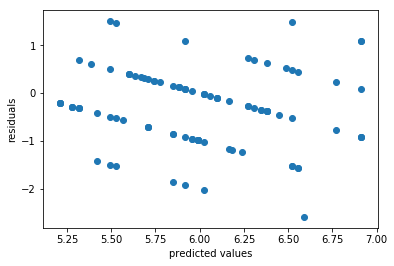

In [33]:
import matplotlib.pyplot as plt

plt.scatter(predicted, residual)
plt.xlabel("predicted values")
plt.ylabel("residuals")